In [1]:
import os
import pandas as pd
from tqdm import tqdm
from scipy.stats import norm, ecdf

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("../../data/Production/master_data.json", typ='series')  # Load the JSON file as a Series
# Convert the series to a dataframe
df_master = df.to_frame().reset_index()

# Rename the columns
df_master.columns = ['location', 'msr']
df_master['location'] = df_master['location'].str.slice(0, -4)

df_master

,location,msr
0,BRU,1244
1,STO,274


In [3]:

def load_and_combine_json(df_master, base_folder_path):
    # Initialize an empty list to store the dataframes
    dfs = []

    # Iterate over each location in the master dataframe
    for index, row in df_master.iterrows():
        location = row['location']
        msr= row['msr']
        print(location)
        # Construct the folder path for this location
        folder_path = os.path.join(base_folder_path, location)
        print(folder_path)

        # Get the list of JSON files in the folder
        file_list = [file for file in os.listdir(folder_path) if file.endswith('.json')]
        
        print(file_list)

        # Iterate over each JSON file and load it into a dataframe
        for file in tqdm(file_list, desc='Loading JSON files'):  # Add a progress bar with tqdm
            file_path = os.path.join(folder_path, file)
            df = pd.read_json(file_path, typ='series')  # Load the JSON file as a Series
            df = pd.DataFrame([df])  # Convert the Series to a DataFrame
            filename_without_extension = file[:-5]  # Remove the last 4 characters
            df['date_String'] = filename_without_extension  # Add a 'filename' column
            df.set_index('date_String', inplace=True)  # Set the 'filename' column as the index
            df['location'] = location  # Add a 'location' column
            df['msr'] = msr # Add a 'msr' column
            # Check if 'date' column exists
            if 'date' in df.columns:
                # Convert the 'date' column to datetime and extract day, month, and year
                df['date'] = pd.to_datetime(df['date'])
                # df['day'] = df['date'].dt.day
                # df['month'] = df['date'].dt.month
                # df['year'] = df['date'].dt.year




            dfs.append(df)


        # Combine all dataframes into one
        combined_df = pd.concat(dfs)
        # print(combined_df)
    return combined_df

df_all = load_and_combine_json(df_master, "../../data/Production/daily/")


BRU
../../data/Production/daily/BRU
['20180101.json', '20180102.json', '20180103.json', '20180104.json', '20180105.json', '20180106.json', '20180107.json', '20180108.json', '20180109.json', '20180110.json', '20180111.json', '20180112.json', '20180113.json', '20180114.json', '20180115.json', '20180116.json', '20180117.json', '20180118.json', '20180119.json', '20180120.json', '20180121.json', '20180122.json', '20180123.json', '20180124.json', '20180125.json', '20180126.json', '20180127.json', '20180128.json', '20180129.json', '20180130.json', '20180131.json', '20180201.json', '20180202.json', '20180203.json', '20180204.json', '20180205.json', '20180206.json', '20180207.json', '20180208.json', '20180209.json', '20180210.json', '20180211.json', '20180212.json', '20180213.json', '20180214.json', '20180215.json', '20180216.json', '20180217.json', '20180218.json', '20180219.json', '20180220.json', '20180221.json', '20180222.json', '20180223.json', '20180224.json', '20180225.json', '20180226.j

Loading JSON files:   0%|          | 0/1830 [00:00<?, ?it/s]

Loading JSON files: 100%|██████████| 1830/1830 [00:21<00:00, 85.05it/s] 


STO
../../data/Production/daily/STO
['20180101.json', '20180102.json', '20180103.json', '20180104.json', '20180105.json', '20180106.json', '20180107.json', '20180108.json', '20180109.json', '20180110.json', '20180111.json', '20180112.json', '20180113.json', '20180114.json', '20180115.json', '20180116.json', '20180117.json', '20180118.json', '20180119.json', '20180120.json', '20180121.json', '20180122.json', '20180123.json', '20180124.json', '20180125.json', '20180126.json', '20180127.json', '20180128.json', '20180129.json', '20180130.json', '20180131.json', '20180201.json', '20180202.json', '20180203.json', '20180204.json', '20180205.json', '20180206.json', '20180207.json', '20180208.json', '20180209.json', '20180210.json', '20180211.json', '20180212.json', '20180213.json', '20180214.json', '20180215.json', '20180216.json', '20180217.json', '20180218.json', '20180219.json', '20180220.json', '20180221.json', '20180222.json', '20180223.json', '20180224.json', '20180225.json', '20180226.j

Loading JSON files: 100%|██████████| 1830/1830 [00:30<00:00, 59.74it/s]


In [4]:
df_all

,DoW,hour,minute,date,maintenance,prod_loss,prod_loss_perc,production,location,msr
date_String,,,,,,,,,,
20180101,Monday,1,0,2018-01-01,No,61,5,1183,BRU,1244
20180102,Tuesday,1,0,2018-01-02,No,106,9,1138,BRU,1244
20180103,Wednesday,1,0,2018-01-03,No,129,10,1115,BRU,1244
20180104,Thursday,1,0,2018-01-04,No,278,22,966,BRU,1244
20180105,Friday,1,0,2018-01-05,No,218,17,1026,BRU,1244
...,...,...,...,...,...,...,...,...,...,...
20221231,Saturday,1,0,2022-12-31,No,51,19,223,STO,274
20230101,Sunday,1,0,2023-01-01,No,53,20,221,STO,274
20230102,Monday,1,0,2023-01-02,No,61,22,213,STO,274


QUESTION : Onderzoek en bepaal een geschikte kansverdeling die het beste past bij de kenmerken van het
productieproces op een dag dat er normaalgesproken gewone productie zou moeten zijn op basis van de
gegevens.

Je mag hierbij uitgaan van het volgende:

De dagen waarop we weten dat er geen productie is, hoeven niet mee in de kansverdeling te worden
gestoken.

Maak een onderscheid tussen de dagen met 0 productie en de dagen met reguliere productie dient wel
gemaakt te worden, dus in je kansverdeling heb je gewoon een bepaalde kans op 0 productie.

Voor de dagen met productie mag je veronderstellen dat de productie normaal verdeeld is, je kan dus
scipy.stats.norm.fit(data) gebruiken om de parameters van de beste normale verdeling te
vinden.

In [5]:
# We verwijderen alle dagen zonder productie om de kansverdeling te bekijken
# Bekijk alle unieke waarden in de productie kolom'
unique_values =  df_all['production'].unique()
# print("Unieke waarden in de productie kolom: {}".format(unique_values))
# Even controleren in welke rijen en hoevaak deze waarde #MV voorkomt.
count_MV = df_all['production'].value_counts().get('#MV', 0)


# vervang MV met 0 zodat we met de Int64 kunnen werken maar behoud originele dataframe
df_all_0 = df_all.copy()
df_all_0.replace('#MV', 0, inplace=True)


# Filter de gegevens om alleen dagen met productie in Brussel en reguliere productie te behouden
df_filtered_BRU = df_all_0[df_all_0.isin(['BRU']).any(axis=1)]
df_regular_production_BRU = df_filtered_BRU[df_filtered_BRU['production'] > 0]



# kans op 0 in bru 
count_0 = df_filtered_BRU['production'].value_counts().get(0, 0)
print ("dagen geen productie in BRU", count_0)
total_values = len(df_filtered_BRU['production'])
percentage_O = (count_0 / total_values) * 100




dagen geen productie in BRU 402


Percentage of 'O' 21.9672131147541
Gemiddelde (mu): 989.218487394958
Standaardafwijking (sigma): 108.90790262811456


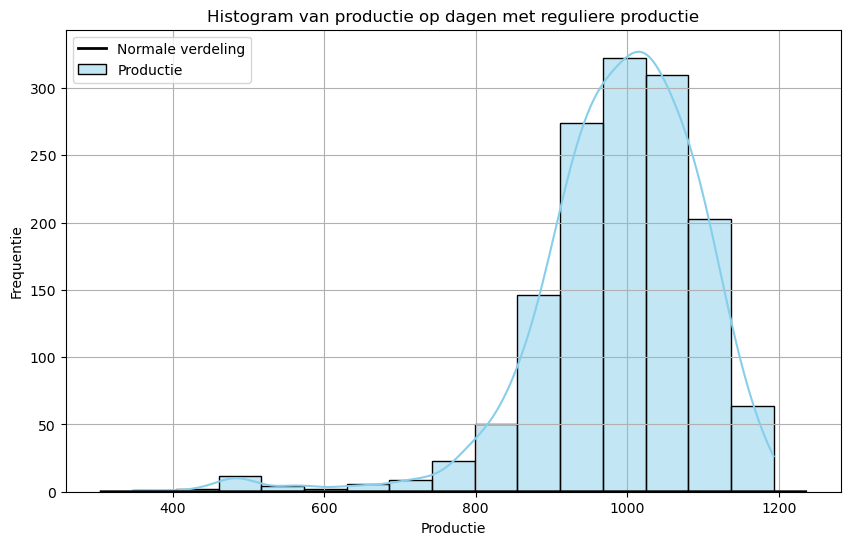

Dit plotje toont een skewed verdeling waarbij de meeste dagen een productie van rond de 1000 wordt gehaald en slechts enkele dagen een lage productieonder 800 wordt gehaald


In [6]:

# Bepaal de parameters van de beste normale verdeling voor de productie op de reguliere dagen
# we mogen uitgaaan van een normaal verdeling
mu, sigma = norm.fit(df_regular_production_BRU['production'])

print("Percentage of 'O'", percentage_O)
print("Gemiddelde (mu):", mu)
print("Standaardafwijking (sigma):", sigma)

# print(df_regular_production_BRU)
# Plot histogram van de productie op dagen met reguliere productie van production unit BRUSSELS
plt.figure(figsize=(10, 6))
sns.histplot(df_regular_production_BRU["production"], bins=15, kde=True, color='skyblue', label='Productie')

# Plot de best passende normale verdeling
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Normale verdeling')

plt.title('Histogram van productie op dagen met reguliere productie')
plt.xlabel('Productie')
plt.ylabel('Frequentie')
plt.legend()
plt.grid(True)
plt.show()

print("Dit plotje toont een skewed verdeling waarbij de meeste dagen een productie van rond de 1000 wordt gehaald en slechts enkele dagen een lage productieonder 800 wordt gehaald")

QUESTION: Maak een Python-programma dat het productieproces kan simuleren over een door de gebruiker bepaalde
periode, n dagen.

Het programma moet de gebruiker flexibiliteit bieden om de duur van de simulatie te
kiezen. 

Het simulatieprogramma mag veronderstellen dat er op alle n dagen normaalgesproken productie zou
moeten zijn, maar elke dag heeft wel een kans om 0 productie te hebben.

Gesimuleerde productie over 150 dagen:
Dag 1: 1008.81
Dag 2: 0.00
Dag 3: 0.00
Dag 4: 0.00
Dag 5: 1221.88
Dag 6: 864.35
Dag 7: 954.19
Dag 8: 1022.17
Dag 9: 1018.33
Dag 10: 0.00
Dag 11: 742.27
Dag 12: 1026.61
Dag 13: 1000.79
Dag 14: 1061.51
Dag 15: 0.00
Dag 16: 834.51
Dag 17: 928.17
Dag 18: 985.19
Dag 19: 0.00
Dag 20: 894.88
Dag 21: 1064.66
Dag 22: 1028.46
Dag 23: 1005.46
Dag 24: 1182.39
Dag 25: 969.31
Dag 26: 1028.29
Dag 27: 827.46
Dag 28: 1095.92
Dag 29: 969.72
Dag 30: 0.00
Dag 31: 965.91
Dag 32: 1166.72
Dag 33: 930.15
Dag 34: 1039.26
Dag 35: 1171.89
Dag 36: 1073.60
Dag 37: 976.35
Dag 38: 1123.85
Dag 39: 919.01
Dag 40: 1050.96
Dag 41: 1126.80
Dag 42: 1016.78
Dag 43: 934.73
Dag 44: 0.00
Dag 45: 909.11
Dag 46: 941.82
Dag 47: 1166.98
Dag 48: 0.00
Dag 49: 1227.63
Dag 50: 0.00
Dag 51: 0.00
Dag 52: 0.00
Dag 53: 890.31
Dag 54: 1004.13
Dag 55: 0.00
Dag 56: 1013.66
Dag 57: 919.14
Dag 58: 950.84
Dag 59: 1056.12
Dag 60: 0.00
Dag 61: 944.72
Dag 62: 970.65
Dag 63: 979.21
Dag 64: 951.77
Dag 65: 1166

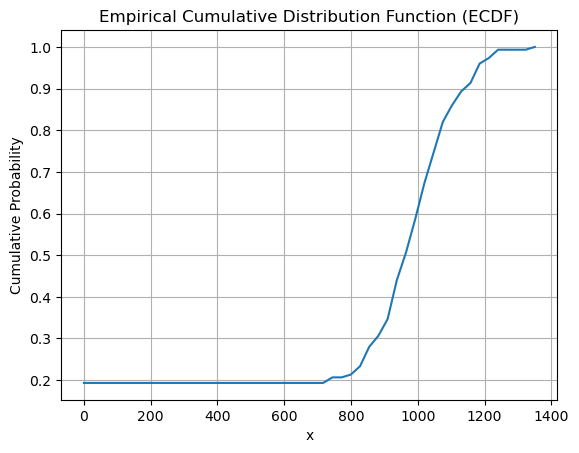

In [13]:
from scipy.stats import norm, ecdf

def simulate_production(days, mu, sigma, zero_production_prob):
    """
    Simuleer het productieproces over een bepaald aantal dagen.
    
    Parameters:
        days (int): Het aantal dagen om te simuleren.
        mu (float): Het gemiddelde van de normale verdeling.
        sigma (float): De standaardafwijking van de normale verdeling.
        zero_production_prob (float): De kans op 0 productie op een dag.
    
    Returns:
        production_simulated (list): Een lijst met gesimuleerde productiewaarden voor elke dag.
    """
    production_simulated = []
    for _ in range(days):
        # Simuleer of er 0 productie is op deze dag
        if np.random.random() < zero_production_prob:
            production_simulated.append(0)
        else:
            # Genereer een gesimuleerde productiewaarde gebaseerd op de normale verdeling
            production_simulated.append(max(0, np.random.normal(mu, sigma)))
    return production_simulated


# Input van de gebruiker voor het aantal dagen om te simuleren
days = int(input("Hoeveel dagen wil je simuleren? "))
zero_production_prob = percentage_O / 100

# # Simuleer het productieproces
ecdc_data = simulate_production(days, mu, sigma, zero_production_prob)

# Toon de gesimuleerde productiewaarden
print("Gesimuleerde productie over {} dagen:".format(days))
for day, production in enumerate(ecdc_data, start=1):
    print("Dag {}: {:.2f}".format(day, production))

# # Remove any zeros from the data (if needed)
# ecdc_data = [x for x in ecdc_data if x != 0]

# Define the cumulative distribution function
def cumulative_distribution_function(x):
    sorted_data = np.sort(ecdc_data)
    n = len(sorted_data)
    cdf = np.searchsorted(sorted_data, x, side='right') / n
    return cdf

# Generate x values from 0 to 10^4
xx = np.linspace(min(ecdc_data), max(ecdc_data))

# Calculate the CDF values for the generated x values
Fxx = cumulative_distribution_function(xx)

# Plot the CDF
plt.plot(xx, Fxx)
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.grid(True)
plt.show()

